In [8]:
!pip install -q nbconvert
!apt-get install -q texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafon

# Introdução

Grupo: Germano Barcelos (3873), Guilherme Melos (3882), Jhonata Miranda (3859)

Neste relatório, serão introduzidos e explorados em prática os conceitos de espaço de cores e segmentação de imagens utilizando as bibliotecas _OpenCV_, _Numpy_, _MatPlotLib_ e _Scipy_ para realizar as atividades propostas.

Neste relatório apresentaremos alguns espaços de cores vistos em aula. Os espaços trabalhados aqui são: BGR, HSV e LAB. O espaço de cores BGR, também conhecido como RGB, é definido pelas três cromaticidades das primárias aditivas vermelha, verde e azul e pode produzir qualquer cromaticidade que seja o triângulo definido por essas cores primárias. A especificação completa de um espaço de cores RGB também requer uma cromaticidade de ponto branco e uma curva de correção de gama. 

Espaços de cor de matiz, saturação e valor (HSV) são frequentemente usados por artistas. "Hue" é o que normalmente pensamos como cor. É o atributo de uma cor pela qual damos a ela um nome como "vermelho" ou "azul". "Valor" é outra palavra para "leveza", o atributo de uma cor que faz parecer equivalente a algum tom de cinza entre preto e branco. A saturação é uma medida de quão diferente uma cor aparece de um cinza da mesma leveza. A saturação zero indica nenhuma tonalidade, apenas a escala cinza. O espaço de cor HSV é normalizado.

O espaço de cor LAB, também conhecido como espaço de cor CIELAB é atualmente o mais popular dos espaços de cores uniformes usados para avaliar as cores. Esse espaço de cor é amplamente utilizado pois correlaciona consistentemente os valores de cor com a percepção visual. Indústrias como as de plástico, tintas, impressão, alimentos e têxtil, além de universidades, utilizam este espaço para identificar, comunicar e avaliar os atributos da cor além das inconsistências ou desvios de uma cor padrão.

#Desenvolvimento

Neste relatório, realizamos os seguintes exercício propostos em aula:


1. Apresentar o script e discutir o script 2 da Aula 2
2. Usar o script 2 para apresentar imagem em LAB, HSV, RGB, mostrando uma imagem de uma flor, de rostos, de umas 4 pessoas e de uma praia, mostrando o mar. Voce pode fazer uma montagem, usando o PAINT mesmo, para criar uma imagem contendo as 3 cenas acima, e apresentar nos 3 espaços de cor. Para cada espaço de cor, trace as 3 bandas isoladas e analise a variação dos objetos na mesma cena.
3. Com a imagem cubos.png, crie mais duas imagens, uma mais escura e outra mais clara.  Converta as 3 imagens para HSV e as bandas separadas, e analise como a imagem varia em cada banda, ou seja, quais as diferenças na banda H,S e V para as 3 imagens (escura, normal e clara)
4. Usando o filme de gols cruzeiro x inter, aplique um filtro de média para uniformizar a imagem, obtenha duas máscaras binárias, sendo uma uma  segmentação utilizando as faixa de valores em RGB, e outra, em HSV (veja qual melhor resultado para criar a mascara com espaço HSV - só H, S ou V, ou uma combinação entre elas), aplique  erosão/dilatação destas duas máscaras para tentar obter dois filmes : Um obtido da segmentação utilizando as faixa de valores em RGB, e outra, em HSV. Pode dilatar muito a máscara para mostrar mais do jogador. O filme resultante deve ser um and entre a máscara obtida e o filme original, e com saída em rgb mesmo... passos: filtro mediana, segmentação com valores RGB e outra com valores HSV; nas máscaras resultantes, aplicar dilatação e erosão. Depois, aplicar as duas máscaras no filme, obtendo dois filmes RGB, um a partir da máscara obtida pelos valores rgb e outro pela HSV



##Exercicio 1

Primeiramente importamos as bibliotecas OpenCV, Numpy, MatPlotLib para executar suas funções:

In [3]:
import cv2 #import openCV2 package
import numpy as np #import numpy as short np 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

Após isso, carregamos a imagem `TEXTOS.png`, fazemos a conversão para o espaço de cores HSV, salvamos cada banda em uma variável, definimos também a fonte `HERSHEY_SIMPLEX`, a posição `org`, a escala da fonte como 1, e salvamos a cor azul em BGR. Também definimos a espessura da linha como 2 pixels.

In [7]:
input = cv2.imread("/content/TEXTOS.png")

hsv_image=cv2.cvtColor(input,cv2.COLOR_BGR2HSV)

B,G,R=cv2.split(input)

# font
font = cv2.FONT_HERSHEY_SIMPLEX
 
# POSICAO
org = (20, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 255, 255)
  
# Line thickness of 2 px
thickness = 2

Após isso, usamos a função `cv2.putText` para que desenha uma string com os parâmetros recebidos. Passamos os parâmetros definidos anteriormente e conseguimos observar o texto colorido e um clareamento da cor de cada faixa a medida em que esta cor vai se aproximando da cor pura. Nota-se que na imagem que utiliza as cores puras, não é possível visualizar a cor corresponte. Já na imagem que mostra os valores BGR com colorações próximas, mas não iguais a original, podemos ainda visualizar a cor e ver que a mesma está se aproximando do branco, enquanto as outras foram clareadas apenas uma certa quantidade, quantidade essa que representa o percentual da cor clareada que está misturada a essa cor.

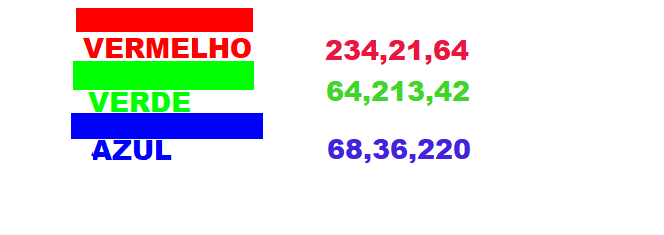

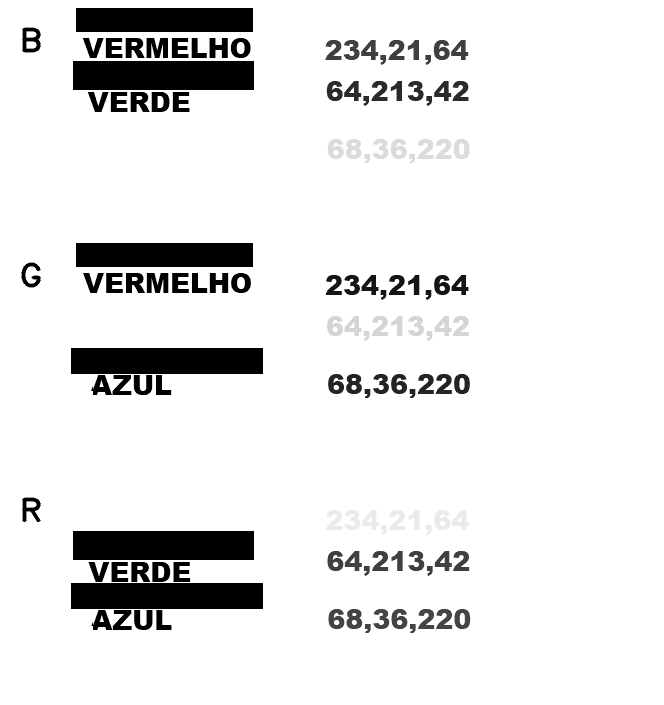

In [9]:
# Using cv2.putText() method
image = cv2.putText(R, 'R', org, font, 
                   fontScale, (0,0,255), thickness, cv2.LINE_AA)

image = cv2.putText(G, 'G', org, font, 
                   fontScale, (0,255,0), thickness, cv2.LINE_AA)

image = cv2.putText(B, 'B', org, font, 
                   fontScale, (0,255,0), thickness, cv2.LINE_AA)


cv2_imshow(input)
imagem=np.vstack((B,G,R))
cv2_imshow(imagem)

Abaixo, é feito o mesmo procedimento realizado acima para o espaço de cores BGR mas, com o espaço HSV. Primeiramente, são exibidas as imagens: `MATIZ.png`, `saturação.png` e `brilho.png`. Após isso, exibimos as bandas HSV de cada uma das imagens utilizadas no exemplo acima.

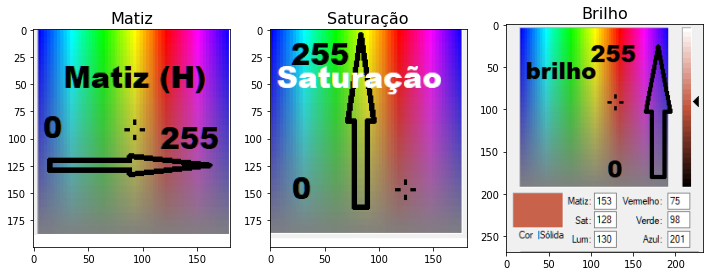

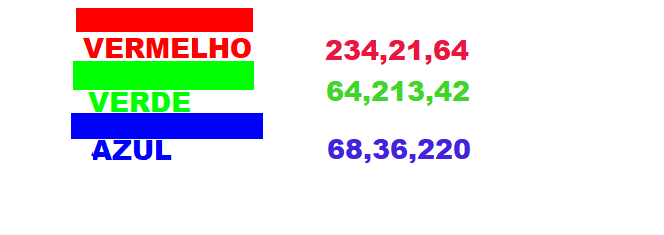

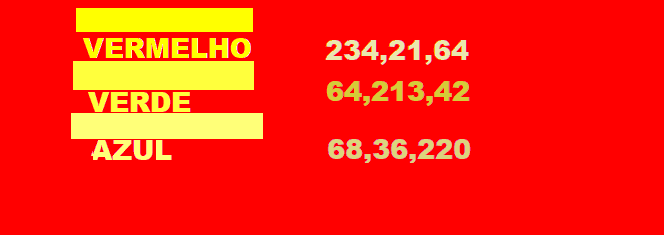

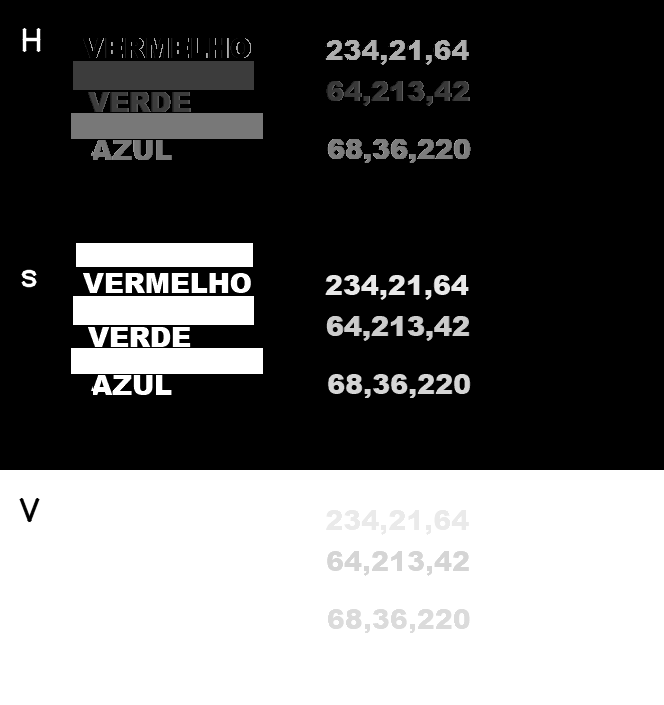

In [15]:
h=cv2.imread("/content/MATIZ.png")
s=cv2.imread("/content/saturação.png")
v=cv2.imread("/content/brilho.png")
plt.figure(figsize = ((12, 6)))
plt.subplot(1, 3, 1)
plt.title("Matiz", fontsize = 16)
plt.imshow(h)
plt.subplot(1, 3, 2)
plt.title("Saturação", fontsize = 16)
#plt.suptitle("Gráficos", fontsize = 20)
plt.imshow(s)
plt.subplot(1, 3, 3)
plt.title("Brilho", fontsize = 16)
plt.imshow(v)
plt.show()

H,S,V=cv2.split(hsv_image)
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# POSICAO
org = (20, 50)
# fontScale
fontScale = 1
# Blue color in BGR
color = (255, 255, 255)
# Line thickness of 2 px
thickness = 2
# Using cv2.putText() method
image = cv2.putText(H, 'H', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
image = cv2.putText(S, 's', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
image = cv2.putText(V, 'V', org, font, 
                   fontScale, (0,0,0), thickness, cv2.LINE_AA)

cv2_imshow(input)
cv2_imshow(hsv_image)
imagem=np.vstack((H,S,V))
cv2_imshow(imagem)

Abaixo, trabalhamos com a banda V da imagem original, gerando o histograma e equalizando o mesmo. Após isso é exibido a banda V antes e depois da equalização e o seus respectivos histogramas. Por fim, mostramos a imagem com HSV equalizado e com BGR equalizado a partir do BGR:

255


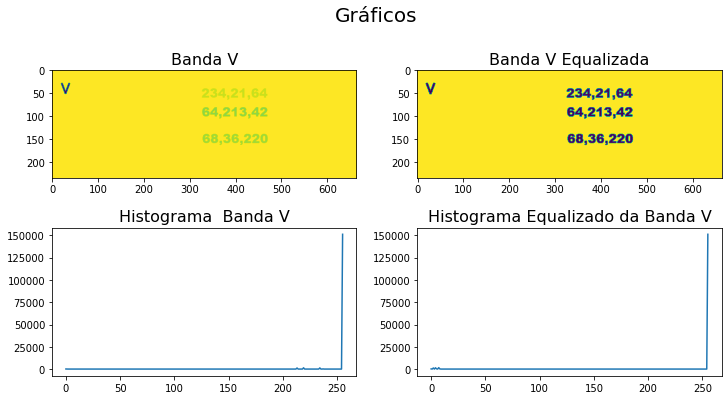

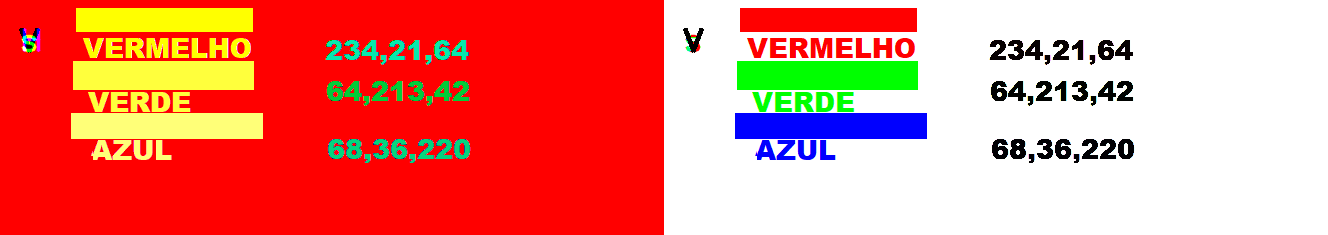

In [20]:

print(np.max(np.max(V)))

#imagem original V
V=np.uint8(V)
#Histograma de V
V_hist = cv2.calcHist([V],[0],None,[256],[0,256])
# Equalizando V
V_equ = cv2.equalizeHist(V) 
V_equ=np.uint8(V_equ)
# Histograma equalizado
V_hist_equ = cv2.calcHist([V_equ],[0],None,[256],[0,256])



plt.figure(figsize = ((12, 6)))
plt.subplot(2, 2, 1)
plt.title("Banda V", fontsize = 16)
plt.imshow(V)

plt.subplot(2, 2, 2)
plt.title("Banda V Equalizada", fontsize = 16)
#plt.suptitle("Gráficos", fontsize = 20)
plt.imshow(V_equ)

plt.subplot(2, 2, 3)
plt.title("Histograma  Banda V", fontsize = 16)
plt.suptitle("Gráficos", fontsize = 20)
plt.plot(V_hist)

plt.subplot(2, 2, 4)
plt.title("Histograma Equalizado da Banda V", fontsize = 16)
plt.suptitle("Gráficos", fontsize = 20)
plt.plot(V_hist_equ)
plt.show()

#mostrando hsv equalizado e rgb equalizado a partir do hsv
hsv=cv2.merge([H,S,V_equ])
rgb=cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
imagem=np.hstack((hsv,rgb))
cv2_imshow(imagem)

##Exercício 2

Para esse exercício, importamos as bibiliotecas OpenCV, Numpy, MatPlotLib, ArgParse, Glob e Time. 

In [27]:
import cv2
import time
import argparse
import glob
import numpy as np
import matplotlib.pyplot as plt

Aqui, definimos duas funções: a função `plot_images` é utilizada para plotar as imagens, já configuradas, utilizando a biblioteca MatPlotLib, já a função `get_spacecolor` é utilizada para converter uma imagem original para os espaços de cores HSV, BGR e LAB.

In [22]:
def plot_images(imgs, titles, x, y, figsize, cmap="viridis"):
    images_list_w_titles = list(zip(imgs, titles))
    
    f, axarr = plt.subplots(x,y, figsize=figsize)
    for i in range(x):
        for j in range(y):
            if x > 1:
                axarr[i, j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[i, j].set_title(images_list_w_titles[(i*y)+j][1])
            else:
                axarr[j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[j].set_title(images_list_w_titles[(i*y)+j][1])

def get_spacecolor(original):
    scale_percent = 60 # percent of original size
    width = int(original.shape[1] * scale_percent / 100)
    height = int(original.shape[0] * scale_percent / 100)
    dim = (width, height)

    original = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
    
    # Convert the BGR image to other color spaces
    imageBGR = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
    imageHSV = cv2.cvtColor(original,cv2.COLOR_BGR2HSV)
    imageLAB = cv2.cvtColor(original,cv2.COLOR_BGR2LAB)
    return imageBGR, imageHSV, imageLAB

### Rostos

Utilizamos a imagem `colagem_rostos.jpg` como referência para exibi-las nos diferentes espaços de cores utilizando as funções definidas acima. Como resultado, plotamos as imagens originais, as conversões e cada uma das faixas de cor de cada um dos espaços.

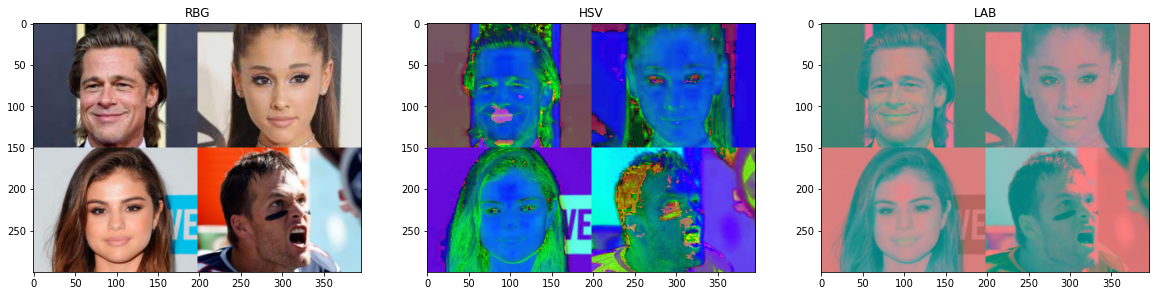

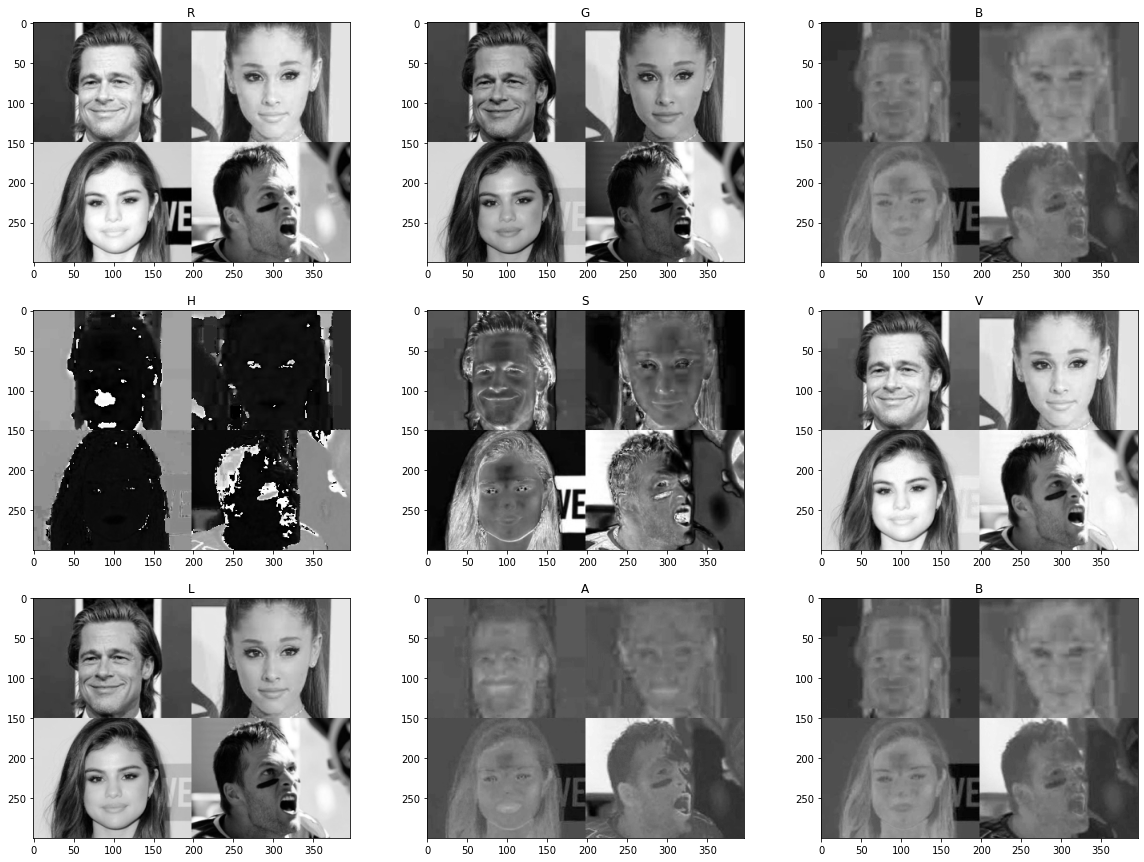

In [23]:
original=cv2.imread("/content/colagem_rostos.jpg")

imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 15), cmap="gray")


### Flor

Por conseguinte, realizamos o mesmo procedimento acima para a imagem `flor.jpg`:

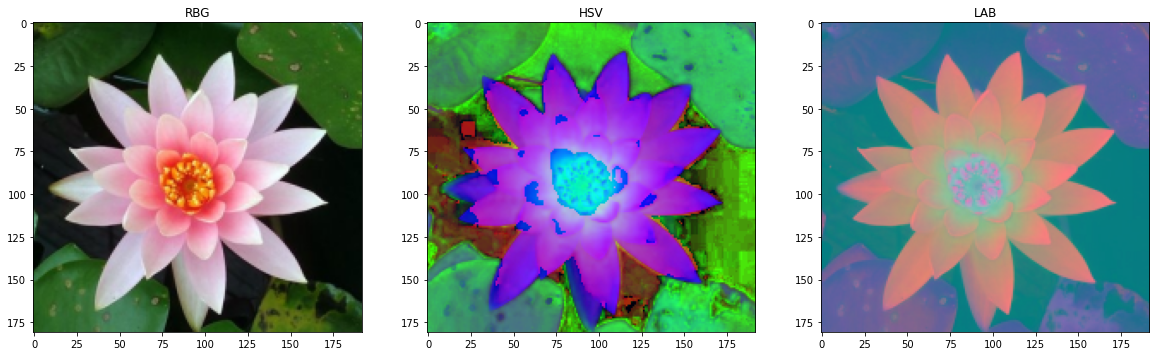

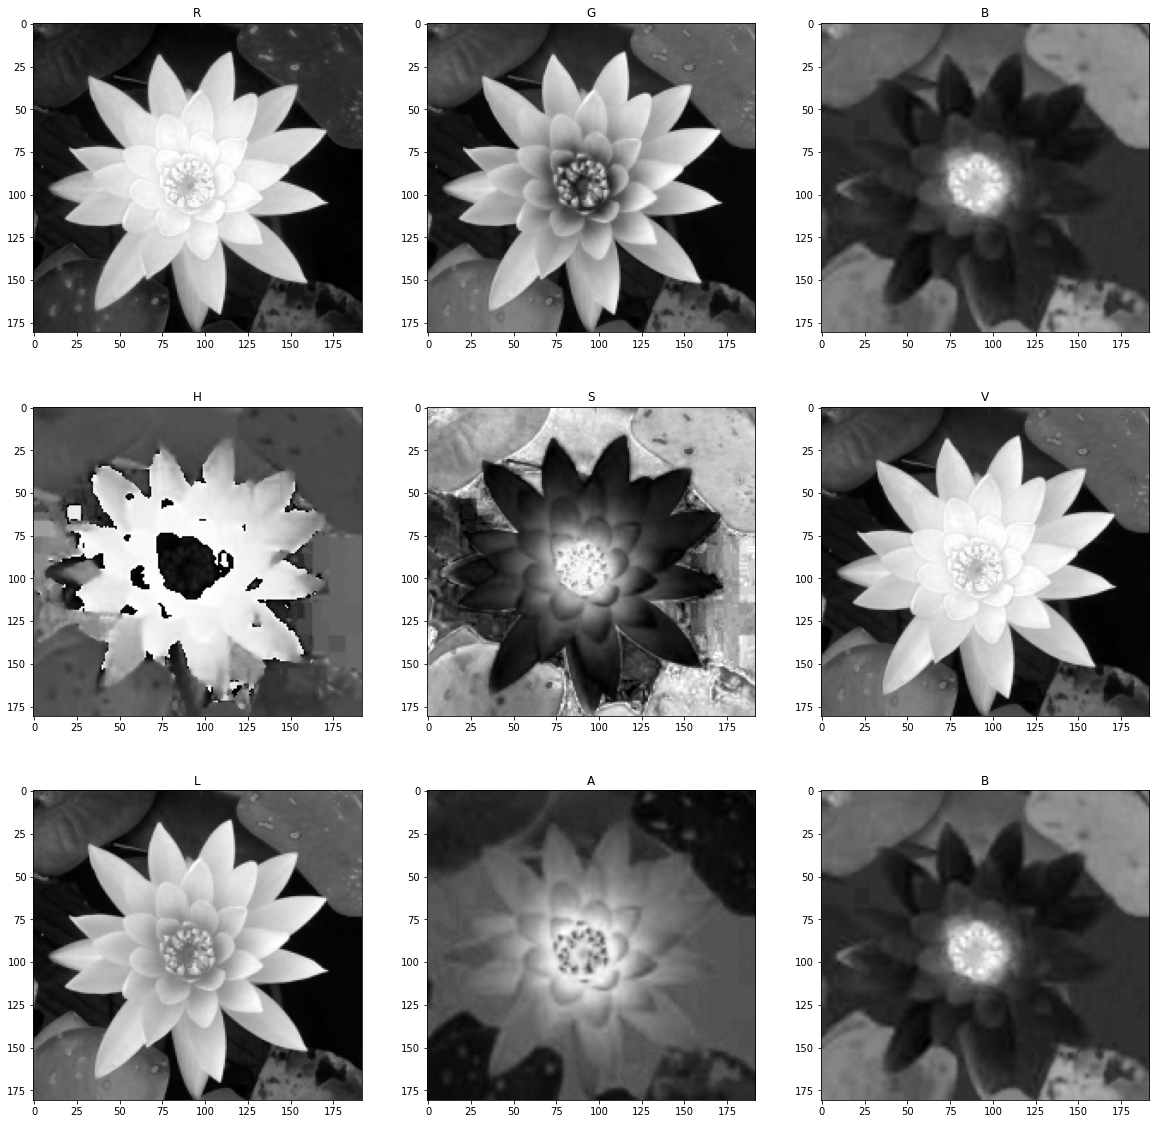

In [24]:
original=cv2.imread("/content/flor.jpg")


imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 20), cmap="gray")

### Praia

Fizemos também o mesmo procedimento para a imagem `praia.jpg`:

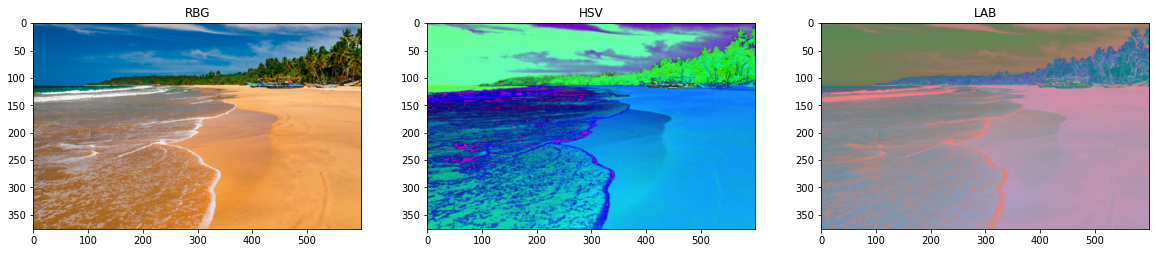

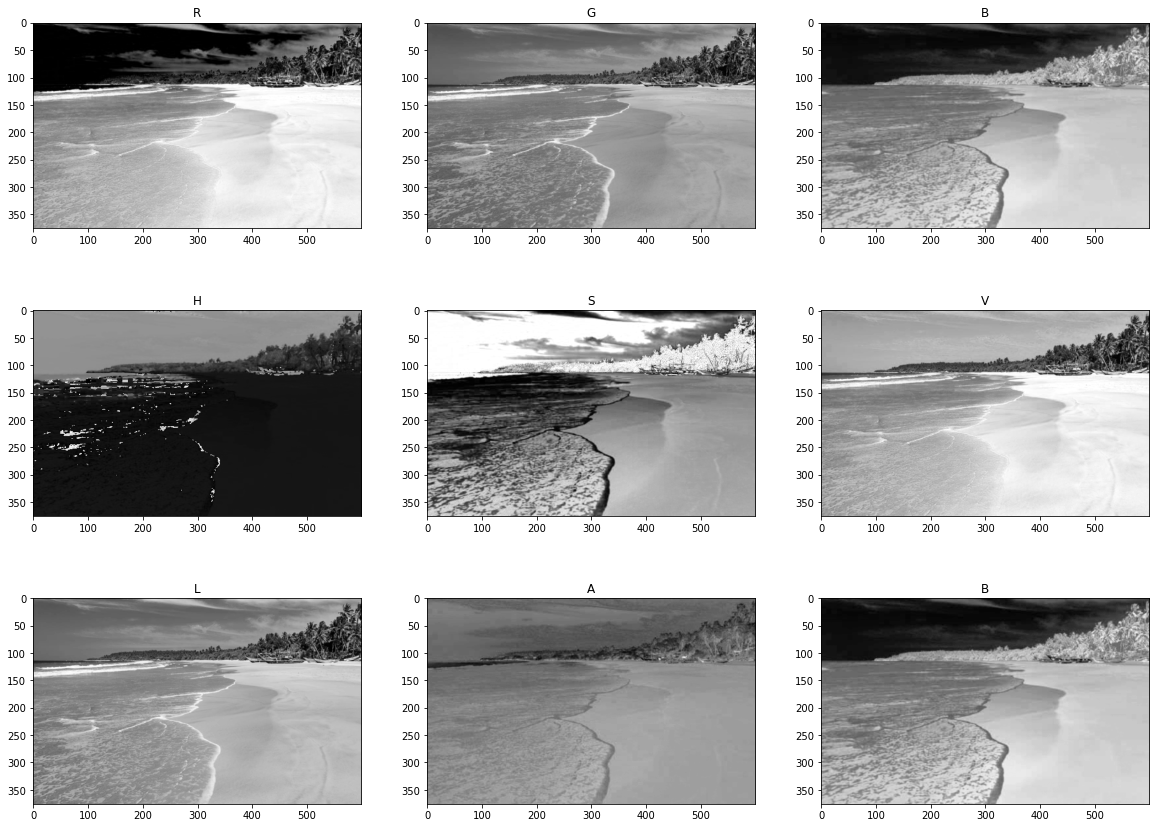

In [26]:
original=cv2.imread("/content/praia.jpg")

imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 15), cmap="gray")

Por fim, utilizamos imagens com diferente tonalidades de cores, brilhos diferente e tentamos diversificar o tipo de imagem para que possamos distinguir os espaços de cores e visualizar a diferença entre eles.

## Exercício 3

Para o exercicio abaixo, utilizamos as bibliotecas OpenCv e Numpy.

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Primeiro reutilizamos a função `controller` para fazer modificações no brilho e contraste de uma imagem e obtermos efeitos mais escuros ou claros dependendo do parâmetro que será passado.

In [3]:
def controller(img, Brilho=255, Contraste=127):
    Brilho = int((Brilho - 0) * (255 - (-255)) / (510 - 0) + (-255))
    Contraste = int((Contraste - 0) * (127 - (-127)) / (254 - 0) + (-127))
 
    if Brilho != 0:
         if Brilho > 0:
             shadow = Brilho
             max = 255
         else:
            shadow = 0
            max = 255 + Brilho
         al_pha = (max - shadow) / 255
         ga_mma = shadow
 
        # The function addWeighted calculates the weighted sum of two arrays
         cal = cv2.addWeighted(img, al_pha, img, 0, ga_mma)
 
    else:
        cal = img
 
    if Contraste != 0:
        Alpha = float(131 * (Contraste + 127)) / (127 * (131 - Contraste))
        Gamma = 127 * (1 - Alpha)
 

        cal = cv2.addWeighted(cal, Alpha, cal, 0, Gamma)
        
    return cal

Com a imagem `cubos.png` carregada, aplicamos efeitos para clarear e escurecer a imagem utilizando os parâmetros 150 para brilho e 150 para contraste para escurecer um pouco a imagem e 330 e 170 para clarear um pouco a mesma. Após isso concatenamos a imagem original com as duas resultantes dos efeitos aplicados e exibimos o conjunto. Após converter as 3 imagens para o espaço de cores HSV separamos cada uma das bandas H, S e V de cada imagem, concatenamos as 3 bandas para cada imagem e exibimos cada um dos resultados.

Imagens: Original + Escura + Clara


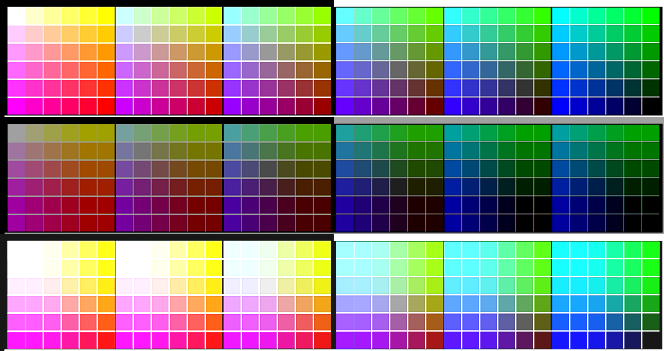

Imagens: Original em faixas H S V


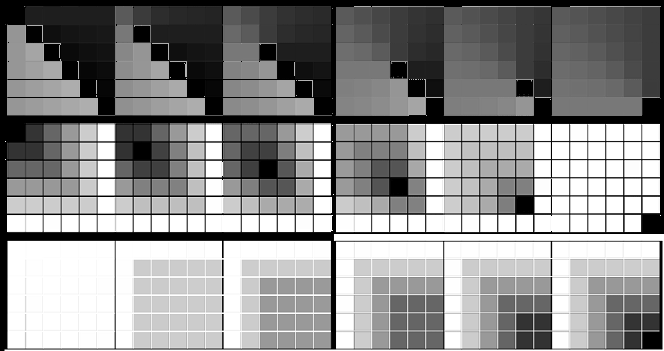

Imagens: Escura em faixas H S V


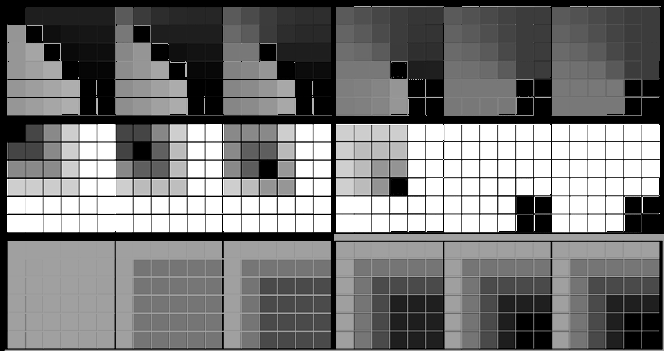

Imagens: Clara em faixas H S V


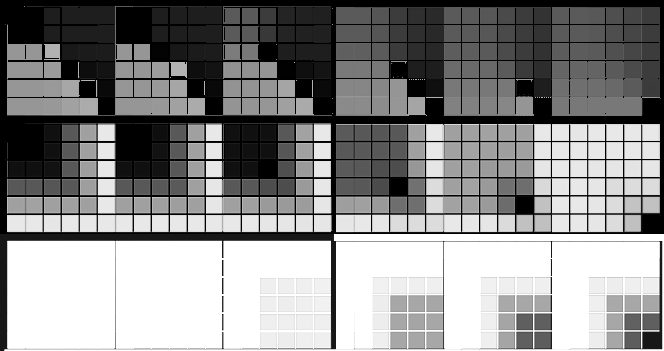

In [7]:
    # The function imread loads an
    # image from the specified file and returns it.
    img_original = cv2.imread("/content/cubos.png")
 
    # Making another copy of an image.
    img = img_original.copy()
 
    
    #aplicando efeitos
    img_escura = controller(img,150,150)
    img_clara = controller(img,330,170)
    
    #concatenando e exibindo imagens
    img_bgr_concat = cv2.vconcat([img_original,img_escura,img_clara])
    print("Imagens: Original + Escura + Clara")
    cv2_imshow(img_bgr_concat)
    
    #convertendo para hsv
    img_original_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img_escura_hsv = cv2.cvtColor(img_escura,cv2.COLOR_BGR2HSV)
    img_clara_hsv = cv2.cvtColor(img_clara,cv2.COLOR_BGR2HSV)

    #separando as bandas
    img_original_hsv_h, img_original_hsv_s, img_original_hsv_v = cv2.split(img_original_hsv)
    img_escura_hsv_h, img_escura_hsv_s, img_escura_hsv_v = cv2.split(img_escura_hsv)
    img_clara_hsv_h, img_clara_hsv_s, img_clara_hsv_v = cv2.split(img_clara_hsv)

    #concatenando e exibindo
    img_original_hsv_concat = cv2.vconcat([img_original_hsv_h,img_original_hsv_s,img_original_hsv_v])
    img_escura_hsv_concat = cv2.vconcat([img_escura_hsv_h,img_escura_hsv_s,img_escura_hsv_v])
    img_clara_hsv_concat = cv2.vconcat([img_clara_hsv_h,img_clara_hsv_s,img_clara_hsv_v])
    print("Imagens: Original em faixas H S V")
    cv2_imshow(img_original_hsv_concat)
    print("Imagens: Escura em faixas H S V")
    cv2_imshow(img_escura_hsv_concat)
    print("Imagens: Clara em faixas H S V")
    cv2_imshow(img_clara_hsv_concat)

Com este exercício podemos visualizar no espaço de cores HSV como a modificação no brilho e contraste da imagem modifica cada uma das bandas, dando destaque para a banda V que tem a maior mudança.

## Exercício 4

Utilizamos o Script abaixo num arquivo .py para destacarmos os times do Cruzeiro e Internacional do video `cruXinter.mp4`. Realizamos o procedimento que consiste em aplicar em cada frame do vídeo uma mascara azul:


1.   Menor cor azul distiguida = [241,150,70]
2.   Maior cor azul distiguida = [300,200,200]

E também aplicamos uma máscara vermelha:


1.   Menor cor vermelha distiguida = [0,0,70]
2.   Maior cor vermelha distiguida = [60,70,255]

Após aplicar cada máscara ao vídeo original, fazemos 3 dilatações para remover os ruidos do vídeo e manter em destaque a camisa de ambos os times. Por fim, aplicamos as duas máscaras, já dilatas ao frame original e obtemos o resultado mostrado no vídeo `saída.avi`.



```
import cv2
import numpy as np

cap = cv2.VideoCapture("images/cruXinter.mp4")
# ret , frame = cap.read()
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))
# print(frame_width, frame_height)

while(True):

    # Take each frame
    ret , frame = cap.read()
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    vid_writer = cv2.VideoWriter('saida.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 60, (frame_width,frame_height))
        
    if ret == True:
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        kernel = np.ones((5, 5), np.uint8)

        # lower_blue = np.array([177, 76, 52])
        # upper_blue = np.array([218, 114, 93])

        lower_blue = np.array([241,150,70])
        upper_blue = np.array([300,200,200])
        mask = cv2.inRange(frame, lower_blue, upper_blue)
        mask2=cv2.dilate(mask, kernel, 3)

        lower_red = np.array([0,0,70])
        upper_red = np.array([60,70,255])
        

        mask_red = cv2.inRange(frame, lower_red, upper_red)
        mask2_red=cv2.dilate(mask_red, kernel, 3)


        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame, frame, mask= (mask2 | mask2_red))


        cv2.imshow('frame', frame)
        # cv2.imshow('mask', mask)
        # cv2.imshow('res', res)
        cv2.imshow('erode/dilate', res)
        
        vid_writer.write((res).astype(np.uint8))
        
        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            cap.release()
            break
vid_writer.release()
cv2.destroyAllWindows()

```



Esse exercício mostrou como a dilatação, juntamento com a aplicação de mascaras podem identificar partes de um vídeo. Isso pode ser usado para diversas outras aplicações, usando o exemplo do vídeo, um dos técnicos poderia destacar a movimentação dos jogadores do seu time em relação aos jogadores do time adversário.

#Conclusão

Com isso, concluimos que os exercícios propostos atuaram como grande fator de entendimento das maneira de manipular os espaços de cores vistos em aula. Podemos notar também as diferenças entre as imagens utilizadas, nos diferentes espaços de cores, visto que ao mudar o espaço de cor de uma imagem, o objetivo é poder trabalhar melhor com a imagem no processamento e, não somente a imagem ter melhor visibilidade ao olho humano. Por fim, o grupo tentou adequar os resultados obtidos aos propostos pelo enunciado dos exercícios e classifica os resultados como satisfatórios.

In [9]:
!jupyter nbconvert --to pdf pratica.ipynb

[NbConvertApp] WARNING | pattern 'pratica.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exe